# descriptive analysis

In [157]:
import pandas as pd # type: ignore
import opendatasets as od # type: ignore
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore
from collections import Counter # type: ignore
import geopandas as gpd # type: ignore
import time # type: ignore

## game_set dataset

In [158]:
game_set = pd.read_csv('./game_set.csv')

In [159]:
game_set

,name_surname,birth,first_profession,second_profession,third_profession,type,title,adult,start_year,minutes_runtimes,genre_1,genre_2,genre_3
0,Fred Astaire,1899,actor,miscellaneous,producer,movie,The Towering Inferno,0,1974,165,Action,Drama,Thriller
1,Lauren Bacall,1924,actress,soundtrack,archive_footage,movie,To Have and Have Not,0,1944,100,Adventure,Comedy,Film-Noir
2,Brigitte Bardot,1934,actress,music_department,producer,movie,Contempt,0,1963,102,Drama,Romance,NaN
3,John Belushi,1949,actor,writer,music_department,tv series,Saturday Night Live,0,1975,90,Comedy,Music,NaN
4,Ingmar Bergman,1918,writer,director,actor,movie,Wild Strawberries,0,1957,92,Drama,Romance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300473,Benjamin Dino,1996,actor,NaN,NaN,movie,Sunset,0,2018,142,Drama,History,NaN
1300474,Thomas Hou Mandsfeldt,1973,actor,producer,NaN,movie,Rose,0,2022,106,Comedy,Drama,NaN
1300475,Yuki Katayama,1996,actress,NaN,NaN,movie,Convenience Story,0,2022,97,Comedy,Fantasy,Romance
1300476,Pardeep Singh Sooch,1987,actor,NaN,NaN,movie,Don't Say Its Name,0,2021,84,Drama,Horror,Mystery


## numpy library

In [160]:
movies = game_set.loc[game_set['type'] == 'movie']

In [161]:
np.max(movies['start_year'])

2026

In [162]:
np.min(movies['start_year'])

1894

In [163]:
tv_series = game_set.loc[game_set['type'] == 'tv series']

In [164]:
np.max(tv_series['start_year'])

2025

In [165]:
np.min(tv_series['start_year'])

1930

In [166]:
actors = game_set.loc[(game_set['first_profession'] == 'actor') | (game_set['first_profession'] == 'actress')]

In [167]:
birth = actors['birth'].to_numpy()
round(np.mean(birth))

1954

In [168]:
time.localtime().tm_year - round(np.mean(birth))

70

In [169]:
round(np.mean(movies['minutes_runtimes']))

101

In [170]:
round(np.mean(tv_series['minutes_runtimes']))

55

In [171]:
total_minutes = np.sum(game_set['minutes_runtimes'])
total_hours = round(np.divide(total_minutes, 60))
total_days = round(np.divide(total_hours, 24))
total_years = round(np.divide(total_days, 365))

print(f'the total number of minuter are {total_minutes}')
print(f'the total number of hours are {total_hours}')
print(f'the total number of days are {total_days}')
print(f'the total number of years are {total_years}')

the total number of minuter are 114538358
the total number of hours are 1908973
the total number of days are 79541
the total number of years are 218


In [190]:
np.min(game_set['minutes_runtimes'])

1

In [191]:
np.max(game_set['minutes_runtimes'])

43200

In [192]:
game_set.loc[game_set['minutes_runtimes'] == np.max(game_set['minutes_runtimes'])]

,name_surname,birth,first_profession,second_profession,third_profession,type,title,adult,start_year,minutes_runtimes,genre_1,genre_2,genre_3
374708,Anders Weberg,1968,director,cinematographer,writer,movie,Ambiancé,0,2020,43200,Documentary,NaN,NaN


## matplotlib library

### type

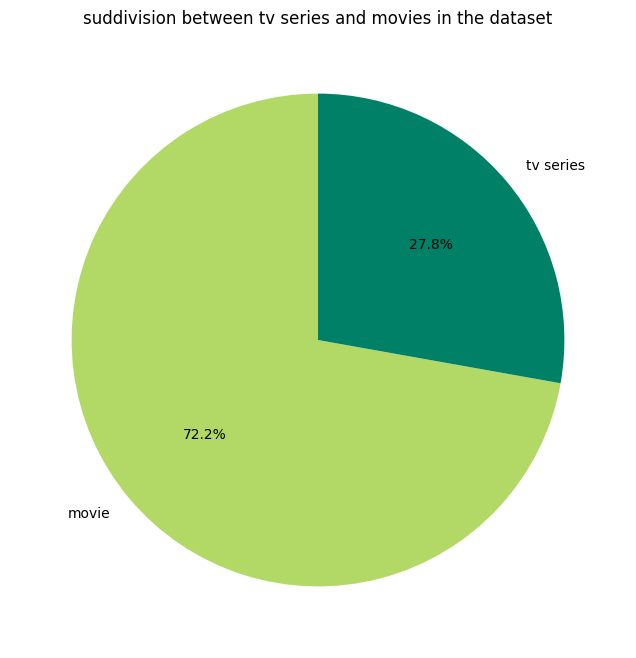

In [175]:
type_counts = Counter(game_set['type'])

categories = list(type_counts.keys())
frequencies = list(type_counts.values())

plt.figure(figsize=(8,8)) 
plt.pie(frequencies, labels=categories, colors=['#B2D966', '#008066'], autopct='%1.1f%%', startangle=90)
plt.title("suddivision between tv series and movies in the dataset")
plt.show()

### starting year

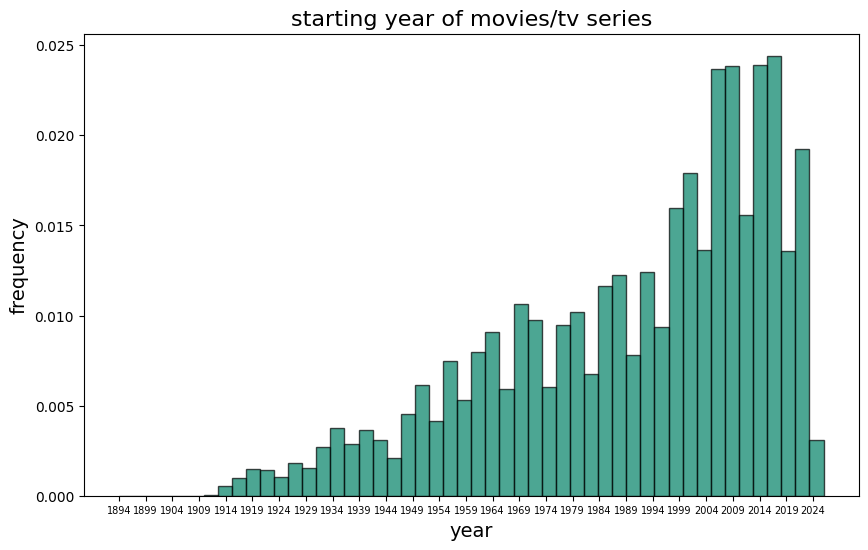

In [176]:
plt.figure(figsize=(10, 6))
plt.hist(game_set['start_year'], bins=50, color='#008066', alpha=0.7, edgecolor='black', density=True)
plt.title('starting year of movies/tv series', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.xticks(np.arange(game_set['start_year'].min(), game_set['start_year'].max(), step=5), fontsize=7)
plt.grid(False)
plt.show()

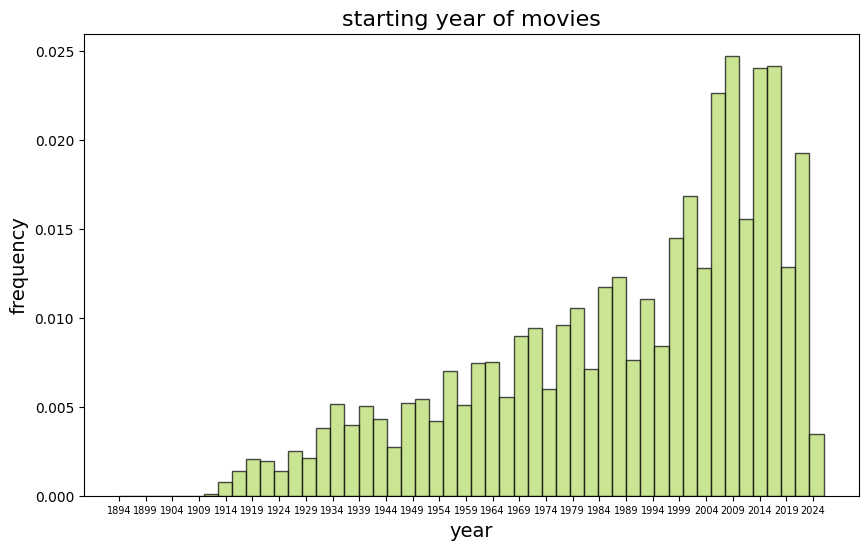

In [177]:
plt.figure(figsize=(10, 6))
plt.hist(movies['start_year'], bins=50, color='#B2D966', alpha=0.7, edgecolor='black', density=True)
plt.title('starting year of movies', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.xticks(np.arange(movies['start_year'].min(), movies['start_year'].max(), step=5), fontsize=7)
plt.grid(False)
plt.show()

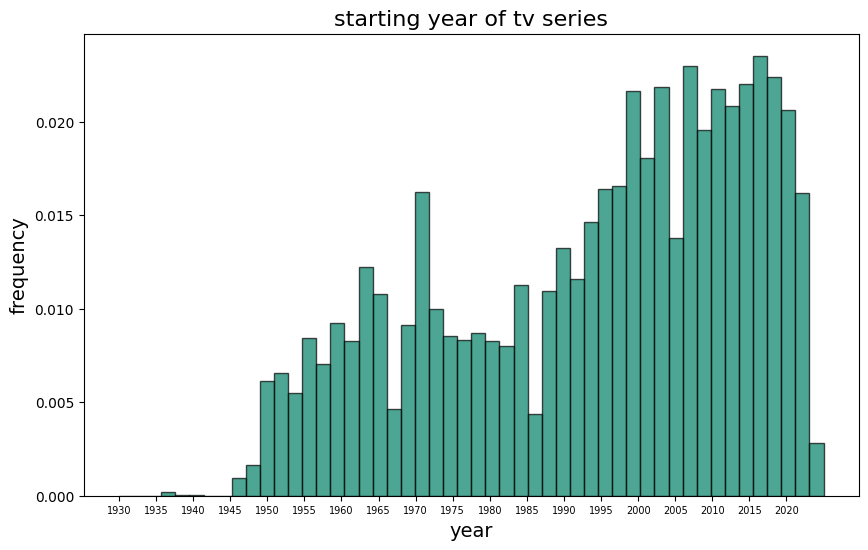

In [178]:
plt.figure(figsize=(10, 6))
plt.hist(tv_series['start_year'], bins=50, color='#008066', alpha=0.7, edgecolor='black', density=True)
plt.title('starting year of tv series', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.xticks(np.arange(tv_series['start_year'].min(), tv_series['start_year'].max(), step=5), fontsize=7)
plt.grid(False)
plt.show()

### profession

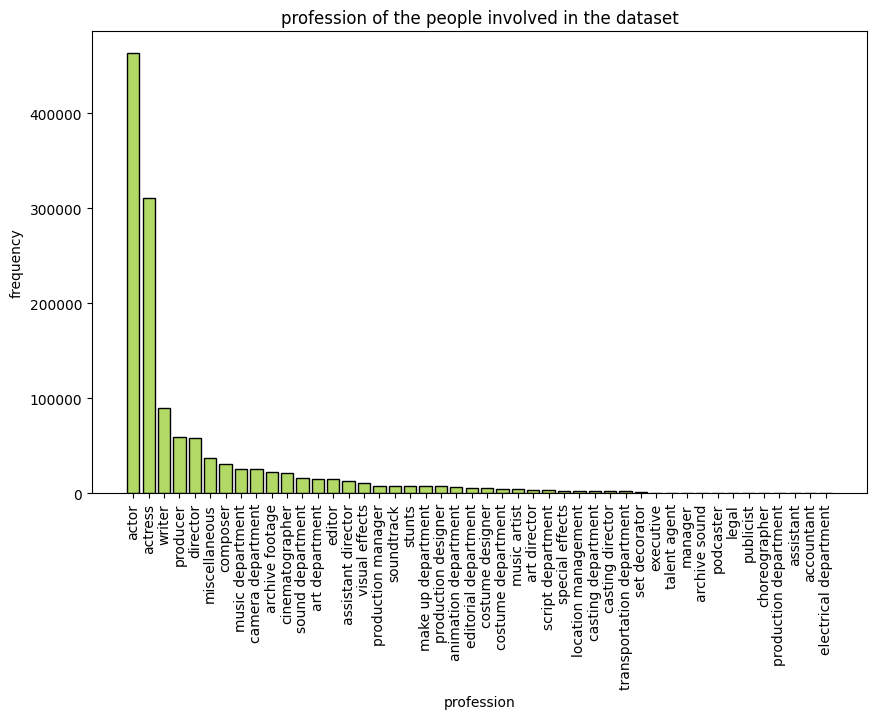

In [179]:
profession_counts = Counter(game_set['first_profession'])

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='#B2D966', edgecolor='black')  
plt.title('profession of the people involved in the dataset')
plt.xlabel('profession')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

### genre

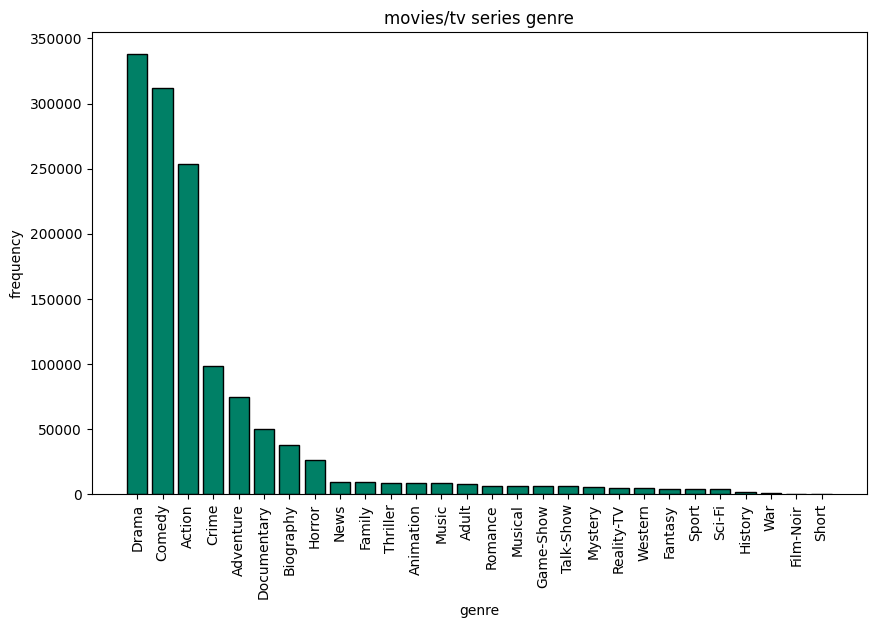

In [180]:
profession_counts = Counter(game_set['genre_1'])

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='#008066', edgecolor='black')  
plt.title('movies/tv series genre')
plt.xlabel('genre')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

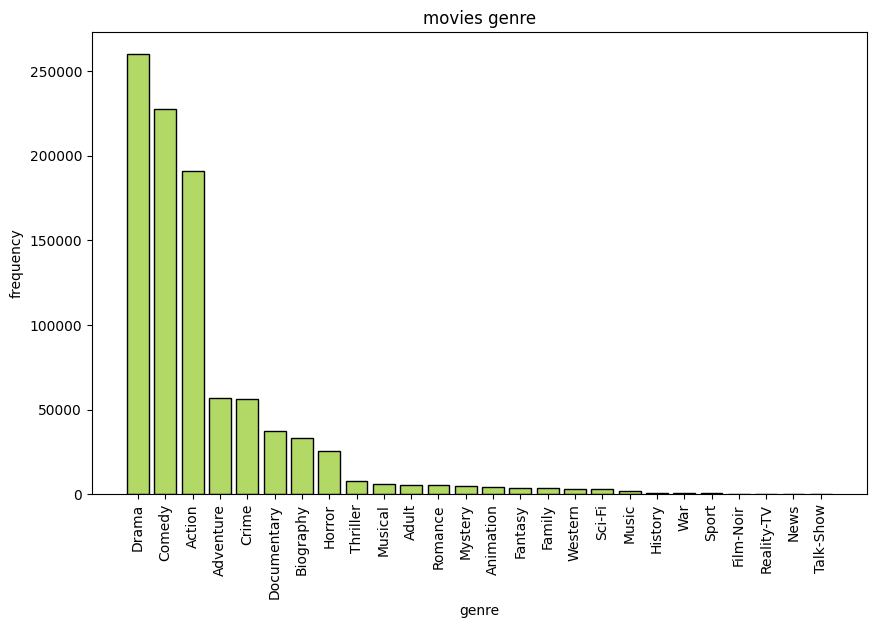

In [181]:
profession_counts_movie = Counter(movies['genre_1'])

categories = list(profession_counts_movie.keys())
frequencies = list(profession_counts_movie.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='#B2D966', edgecolor='black')  
plt.title('movies genre')
plt.xlabel('genre')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

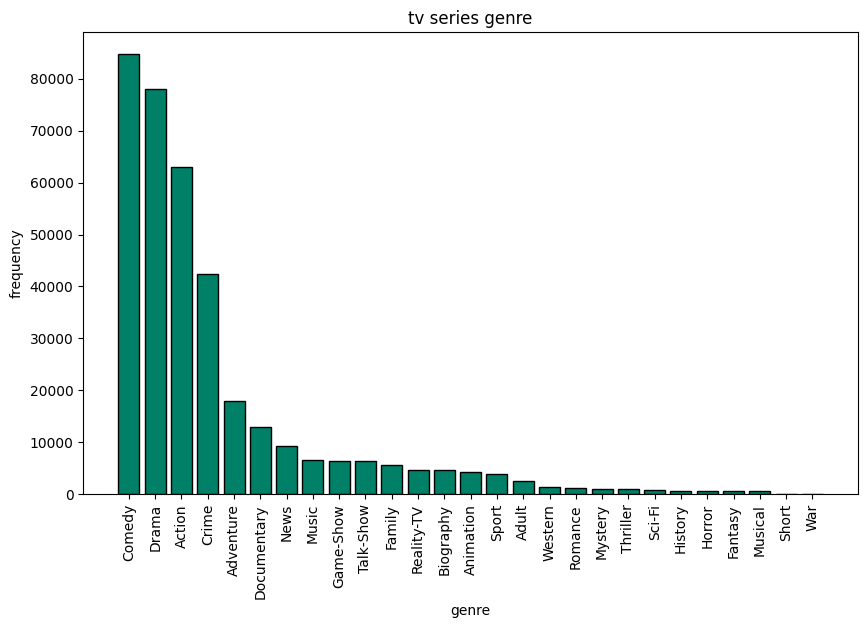

In [182]:
profession_counts_tvseries = Counter(tv_series['genre_1'])

categories = list(profession_counts_tvseries.keys())
frequencies = list(profession_counts_tvseries.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='#008066', edgecolor='black')  
plt.title('tv series genre')
plt.xlabel('genre')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

### adult

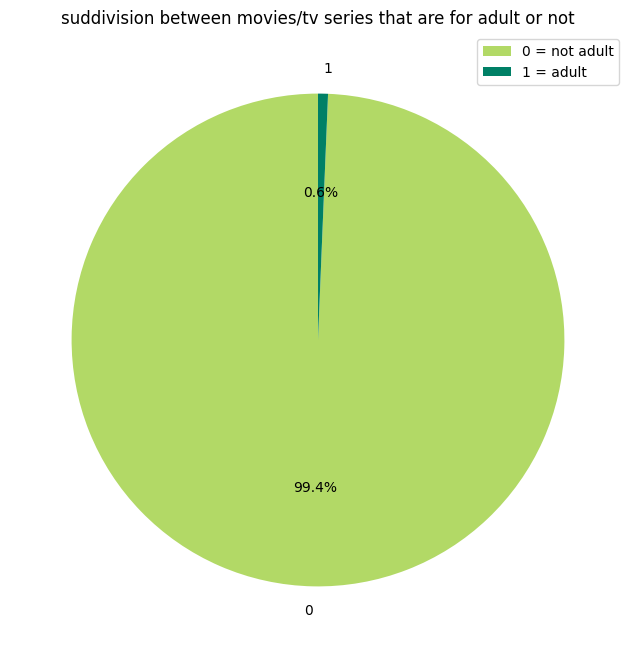

In [183]:
adult_counts = Counter(game_set['adult'])

categories = list(adult_counts.keys())
frequencies = list(adult_counts.values())

plt.figure(figsize=(8,8)) 
plt.pie(frequencies, labels=categories, colors=['#B2D966', '#008066'], autopct='%1.1f%%', startangle=90)
plt.legend(["0 = not adult", "1 = adult"], loc="best")
plt.title("suddivision between movies/tv series that are for adult or not")
plt.show()

## merge_set dataset

In [184]:
merge_set = pd.read_csv('./merge_set.csv')

In [185]:
counries_counts = Counter(merge_set['region'].dropna(how='any'))

df = pd.DataFrame({'country': list(counries_counts.keys()), 'frequency': list(counries_counts.values())})

In [186]:
df['country'].unique()

array(['US', 'AR', 'MX', 'PE', 'VE', 'AT', 'DE', 'XWG', 'CA', 'AU', 'FR',
       'CSHH', 'SK', 'PT', 'IR', 'DK', 'ES', 'NO', 'BR', 'RO', 'TR', 'IT',
       'EE', 'FI', 'LT', 'TH', 'GR', 'HR', 'PL', 'EC', 'HU', 'CZ', 'SE',
       'JP', 'KR', 'BE', 'BG', 'GB', 'SUHH', 'RS', 'UA', 'TW', 'IL', 'IN',
       'NL', 'PH', 'XYU', 'SI', 'CN', 'XWW', 'UY', 'ZA', 'HK', 'EG', 'VN',
       'LV', 'ID', 'AE', 'SG', 'DDDE', 'RU', 'CL', 'KZ', 'AZ', 'UZ', 'CH',
       'NZ', 'CO', 'PA', 'IE', 'CM', 'BY', 'XEU', 'GE', 'IS', 'YUCS',
       'BF', 'BJ', 'AL', 'XKO', 'QA', 'BD', 'GT', 'MK', 'CU', 'BA', 'MD',
       'LU', 'CR', 'DO', 'AM', 'XAS', 'TN', 'DZ', 'PR', 'JM', 'MY', 'NG',
       'PK', 'CG', 'SV', 'LB', 'BO', 'PY', 'TM', 'MZ', 'TJ', 'ME', 'MA',
       'XSA', 'KG', 'CI', 'AF', 'AW', 'MN', 'GL', 'LK', 'NP', 'SY', 'TO',
       'KP', 'LI', 'SN', 'SA', 'IQ', 'PS', 'KH', 'GH', 'KW', 'CY', 'XPI',
       'MC', 'HT', 'CSXX', 'ML', 'YE', 'GI', 'UG', 'ZW', 'SR', 'GN', 'MO',
       'BS', 'MR', 'BT', 'TD', 'ZM', 'G

In [187]:
world_data = gpd.read_file("map/ne_110m_admin_0_countries.shp")

In [188]:
world_data['ISO_A2_EH'].unique()

array(['FJ', 'TZ', 'EH', 'CA', 'US', 'KZ', 'UZ', 'PG', 'ID', 'AR', 'CL',
       'CD', 'SO', 'KE', 'SD', 'TD', 'HT', 'DO', 'RU', 'BS', 'FK', 'NO',
       'GL', 'TF', 'TL', 'ZA', 'LS', 'MX', 'UY', 'BR', 'BO', 'PE', 'CO',
       'PA', 'CR', 'NI', 'HN', 'SV', 'GT', 'BZ', 'VE', 'GY', 'SR', 'FR',
       'EC', 'PR', 'JM', 'CU', 'ZW', 'BW', 'NA', 'SN', 'ML', 'MR', 'BJ',
       'NE', 'NG', 'CM', 'TG', 'GH', 'CI', 'GN', 'GW', 'LR', 'SL', 'BF',
       'CF', 'CG', 'GA', 'GQ', 'ZM', 'MW', 'MZ', 'SZ', 'AO', 'BI', 'IL',
       'LB', 'MG', 'PS', 'GM', 'TN', 'DZ', 'JO', 'AE', 'QA', 'KW', 'IQ',
       'OM', 'VU', 'KH', 'TH', 'LA', 'MM', 'VN', 'KP', 'KR', 'MN', 'IN',
       'BD', 'BT', 'NP', 'PK', 'AF', 'TJ', 'KG', 'TM', 'IR', 'SY', 'AM',
       'SE', 'BY', 'UA', 'PL', 'AT', 'HU', 'MD', 'RO', 'LT', 'LV', 'EE',
       'DE', 'BG', 'GR', 'TR', 'AL', 'HR', 'CH', 'LU', 'BE', 'NL', 'PT',
       'ES', 'IE', 'NC', 'SB', 'NZ', 'AU', 'LK', 'CN', 'TW', 'IT', 'DK',
       'GB', 'IS', 'AZ', 'GE', 'PH', 'MY', 'BN', 'S

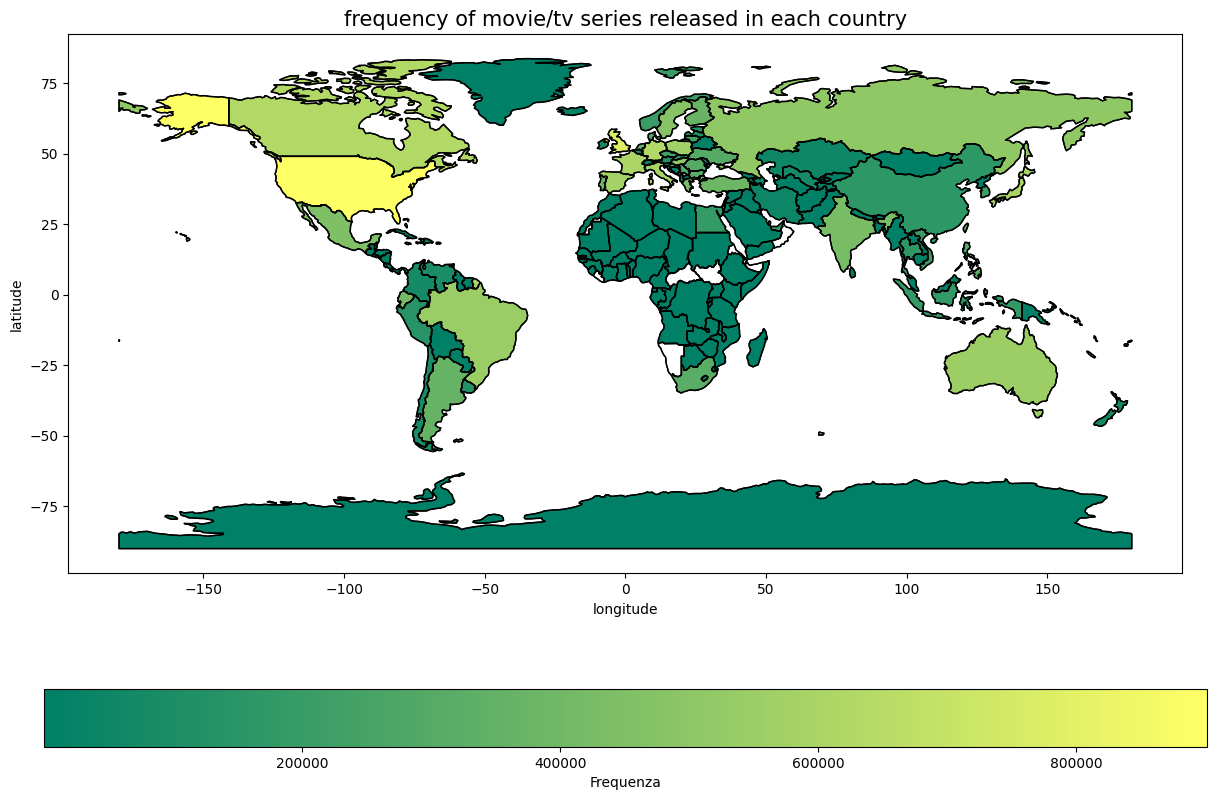

In [189]:
merged = world_data.set_index('ISO_A2_EH').join(df.set_index('country'), how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.boundary.plot(ax=ax, linewidth=1, color='black')  
merged.plot(column='frequency', ax=ax, legend=True,
            legend_kwds={'label': "Frequenza",
                         'orientation': "horizontal"},
            cmap='summer', edgecolor='black', missing_kwds={"color": "white"})

plt.title('frequency of movie/tv series released in each country', fontsize=15)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()